# Apresentação, introdução, iniciação ao problema...

---

Esse é um famoso banco de dados que provém de uma competição do [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Ele está disponível neste [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) e tem a seguinte descrição

**Comece aqui se**:

1. Você tem experiência com R ou Python; e
2. Conhece um pouco sobre aprendizado de máquina;

Ideal para uma pessoa que está aprendendo análise de dados em Python (em R eu já estou em um nível relativamente intermediário) e também aprendizado de máquina (igual eu, neste momento). 

## Descrição da competição 

---

Esse é um banco de dados *playground*, justamente para aplicarmos tudo aquilo que aprendemos em análise de dados e previsão. Também menciona a parte que muitas coisas, como o número de banheiros, influencia no valor de uma casa.

O banco de dados possui 79 variáveis explicativas, estas referem aos aspectos residenciais de casas da cidade de Ames em Iowa.

## Objetivo

---

A partir destas 79 variáveis explicativas, isto é, as características das casas, prever o valor de casa. 

## Habilidades que serão praticadas (segundo o Kaggle)

---

1. Criatividade na criação da *feature engineering* (recomendo pesquisar no Google caso não saiba o que é isso); e
2. Para a parte de previsão (aprendizado de máquina): utilização de regressão, random forest, gradient boosting, etc.

## Métrica para verificação dos resultados

---

Será utilizado o Root-Mean-Squared-Error (RMSE), para os mais intimos, a raiz do erro quadrático médio, entre o *log* do valor que o nosso modelo preveu, ou estimou, ($ \hat{y_i} $) e o real valor da casa ($ y $). A fórmula para o RMSE é dada por

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i = 1}^{n} (\hat{y_i} - y_i)^2} $$ 

# Bibliotecas utilizadas

---

- Pandas
- Numpy
- Matplotlib
- Seaborn
- Sklearn

Sim, para quem não sabe eu venho do R, e eu realmente acho que os gráficos do ggplot são absurdos de bonito. Portanto, continuarei usando o mesmo no Python :) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


plt.style.use('ggplot')
%matplotlib inline

# Carregando os dados com o Pandas

---

In [2]:
treino = pd.read_csv(filepath_or_buffer = "train.csv")
teste = pd.read_csv(filepath_or_buffer = "test.csv")

# Explorando os dados

---

## Verificando a estrutura dos dados

Quando baixamos os dados do *Kaggle*, eles vem em um arquivo ZIP com os dados de **treino, teste, a amostra para submissão e um dicionário de cada variável**, mostrando o que significa cada uma e seus respectivos valores. Então, qualquer manuseio, exploração, modificação, etc, será feito nos dados de teste.

Podemos inicialmente verificar como os dados estão organizados, um simples *overview* com o método `.head`.

In [3]:
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


A partir do método `.head`, verificamos que, aparentemente, os dados estão em um formato ok, entretanto, não conseguimos ver os valores de todas as colunas (variáveis). Logo, podemos utilizar o método `.info` para verificar o formato de cada uma e seus valores. 

In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

---

Com essa visualização, podemos confirmar o que foi dito na introdução, que realmente são 79 variáveis explicativas e a última variável (**SalePrice**) é a variável que queremos prever a partir destas. Assim como podemos observar que são muuuuuuuitas variáveis, estas nos trazem informações desde o tipo de moradia, se a residência possui ar condicionado até a condição em que está a garagem da residência.

---

## Explorando a variável SalePrice


Podemos ter `n` ideias aqui, mas, inicialmente, podemos ver como é a distribuição da variável que queremos prever, o Preço de Venda, através de um histograma.

Percebemos que a distribuição do Preço de Vendas possui concentração negativa ou cauda à direita, indicando que os valores predominantes são baixos (para a variável), uma distribuição F de Snedecor caíria bem, talvez. 

**Também podemos notar que:**

- A maior quantidade preços vendidos, isto é, o valor mais frequente do preço de casas está entre \\$ 100.000,00 e  \\$ 150.000,00;

- Também podemos ver casos em que o preço de venda foi \\$ 600.000,00 ou \\$ 700.000,000, entretanto, eles não são tão frequentes, quando comparados com os valores da variável (seriam eles outliers?);

**Nota**: Também é utilizado a densidade da variável, ela é estimada a partir dos dados e o método mais comum para essa estimação é o KDE (Kernel Density Estimation). Um *Kernel* comumente utilizado é o gaussiano.  

---

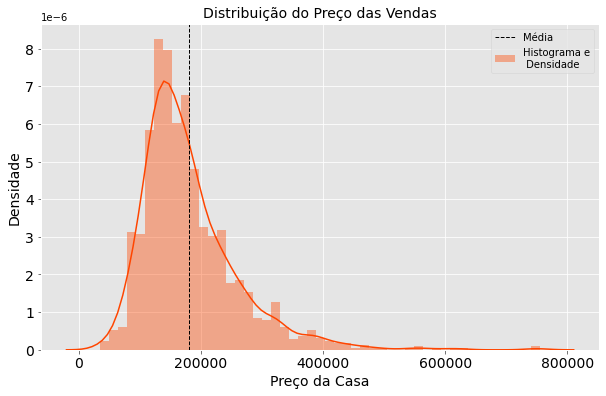

In [5]:
media_sales_price = treino["SalePrice"].mean()
var_sales_price = treino["SalePrice"].var()

plt.figure(figsize = [10, 6])
sns.distplot(treino["SalePrice"], color = "orangered", hist = True, label = "Histograma e\n Densidade")
plt.axvline(media_sales_price, color = 'k', linestyle = 'dashed', linewidth = 1, label = "Média")
plt.xlabel("Preço da Casa", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.title("Distribuição do Preço das Vendas", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 14, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 14, labelcolor = "black")
plt.legend()
plt.show()

---

**Abaixo podemos ver o sumário estatístico da variável Preço de Vendas, podemos afirmar que:**

- Realmente temos 1.460 observações nesta variável;

- O preço médio de venda das casas, assim como já plotada no histograma, é de, aproximadamente, \\$ 180.921,00;

- O desvio padrão do preço de venda das casas é alto, \\$ 79.442,00, indicando que temos alta variabilidade;

- O preço mediano de venda de casas, valor que separa os dados em 50% acima e abaixo da variável, foi de \\$ 163.000,00, indicando que metade dos valores está acima deste valor e a outra metade abaixo;

- O valor máximo de venda de casas foi de \\$ 755.000,00.


---

In [6]:
treino["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Regressão Linear Múltipla

Múltipla pois utilizaremos várias variáveis para prever o Preço da Casa (SalePrice).

## Pressupostos para o seu uso

Assim como qualquer técnica estatística, a regressão também possui pressupostos para seu uso (**sim, não adianta só olhar a técnica e aplicar**). Cada pressuposto possui nos leva a um determinado problema caso não seja atendido.

- Neste [artigo](https://periodicos.ufpe.br/revistas/politicahoje/article/download/3808/31622) os autores retiraram da literatura 10 pressupostos para o uso da regressão linear;
- Já neste [tutorial](https://posgraduando.com/como-fazer-uma-analise-de-regressao-linear-simples-no-r/), o autor ([Herick Santana](https://www.facebook.com/herick.santana.10?ref=tn_tnmn)) menciona o uso de 3 pressupostos: 

    - Linearidade entre as variáveis X e Y;
    - Normalidade nos resíduos da regressão; e
    - Homogeneidade das variâncias
  
- Neste [material](http://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Econometria_RevisaoRegressaoLinear.pdf) do professor Alexandre Gori Maia, ele menciona os seguintes pressupostos:

    - Relação linear entre as variáveis X e Y
    - Os valores de X são fixos em repetidas amostras, não aleatórios
    - Esperança condicional dos erros igual a zero, ou seja, $ E(e|Xi) = 0 $;
    - A variabilidade dos erros é constante; e
    - Os erros são não autocorrelacionados.   
    
Vamos focar nos pressupostos do tutorial do [Herick Santana](https://www.facebook.com/herick.santana.10?ref=tn_tnmn), pois é o que mais atende a nossa necessidade de previsão e aplicar nos dados de treino.

## Linearidade entre X e Y

---

Uma forma de verificar a relação entre as variáveis X e Y, caso elas sejam quantitativas, é por meio do coeficiente de correlação de Pearson, pois ele mede o grau da correlação linear entre duas variáveis. 

Resumindo, a correlação linear de Pearson pode adotar valores que vão de de -1 a 1. Quanto mais próximo de -1 ou 1, maior é a relação linear entre ambas as variáveis (X e Y) e quanto mais próximo de 0 menor a relação a linear. O sinal (positivo ou negativo) indica uma correlação linear positiva ou negativa entre X e Y.   

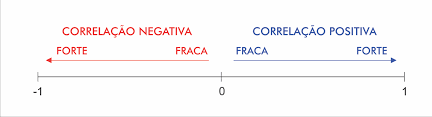


O que podemos fazer, já que temos mais de uma variável preditora, é fazer uma matriz ou um gráfico de correlação.


**Para mais informações sobre a correlação linear de Pearson, visite:** 

- http://www.inf.ufsc.br/~vera.carmo/Correlacao/Correlacao_Pearson_Spearman_Kendall.pdf
- https://operdata.com.br/blog/coeficientes-de-correlacao/
- http://www.leg.ufpr.br/~silvia/CE701/node79.html

Abaixo, podemos observar a matriz de correlação em formato de gráfico, pois, em vez de ver uma tabela imensa que nem cabe no Jupyter, o gráfico também é mais intuitivo dado a legenda e a as cores. 

Apesar de que a matriz de correlação, pelo *default* vai selecionar somente as variáveis numéricas, entretanto, algumas variáveis que foram categorizadas, isto é, transformadas de qualitativas para quantitativas, como a **MSSubClass**, aparecem. Logo, devemos retirar estas variáveis, já que não é através da Correlação de Pearson que verificamos uma relação linear entre variável qualitativa e quantitativa.

Assim como a **MSSubClass**, as variáveis retiradas foram: 

- Id;
- OverallQual; e
- OverallCond.

---

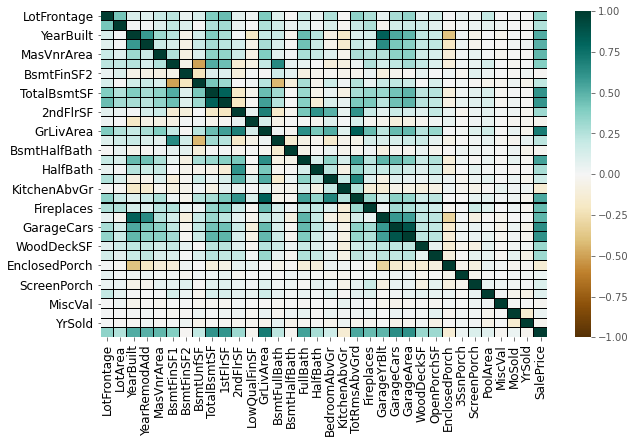

In [7]:
var_quant = treino._get_numeric_data()
var_quant = var_quant.drop(["Id", "MSSubClass", "OverallQual", "OverallCond"], axis = 1)


corr_var_quant = var_quant.corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_var_quant, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG")
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

---

**Observando** o gráfico de correlação podemos notar que:

- A visualização está relativamente dificultada, pois no eixo Y não estão todas as variáveis;

- Muitas variáveis não possuem correlação linear ou possuem fraca correlação, como a **PoolArea, MiscVal, MoSold e YrSold**;

- São poucas as variáveis que possuem forte correlação linear com a SalePrice (a partir de agora é melhor falar o exato nome da variável)

---

In [8]:
corr_var_quant["SalePrice"].round(2)

LotFrontage      0.35
LotArea          0.26
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.48
BsmtFinSF1       0.39
BsmtFinSF2      -0.01
BsmtUnfSF        0.21
TotalBsmtSF      0.61
1stFlrSF         0.61
2ndFlrSF         0.32
LowQualFinSF    -0.03
GrLivArea        0.71
BsmtFullBath     0.23
BsmtHalfBath    -0.02
FullBath         0.56
HalfBath         0.28
BedroomAbvGr     0.17
KitchenAbvGr    -0.14
TotRmsAbvGrd     0.53
Fireplaces       0.47
GarageYrBlt      0.49
GarageCars       0.64
GarageArea       0.62
WoodDeckSF       0.32
OpenPorchSF      0.32
EnclosedPorch   -0.13
3SsnPorch        0.04
ScreenPorch      0.11
PoolArea         0.09
MiscVal         -0.02
MoSold           0.05
YrSold          -0.03
SalePrice        1.00
Name: SalePrice, dtype: float64

---

**Observando** valores maiores que 0.5 ou menor que -0.5, temos as variáveis mais correlacionadas linearmente com a SalePrice:
       
     - YearBuilt;
     - YearRemodAdd;
     - TotalBsmtSF;
     - 1stFlrSF;
     - GrLivArea;
     - FullBath; 
     - TotRmsAbvGrd;
     - GarageCars;
     - GarageArea.
     
Podemos agora verificar a correlação especificamente entre as nossas variáveis do novo conjunto de dados.

---

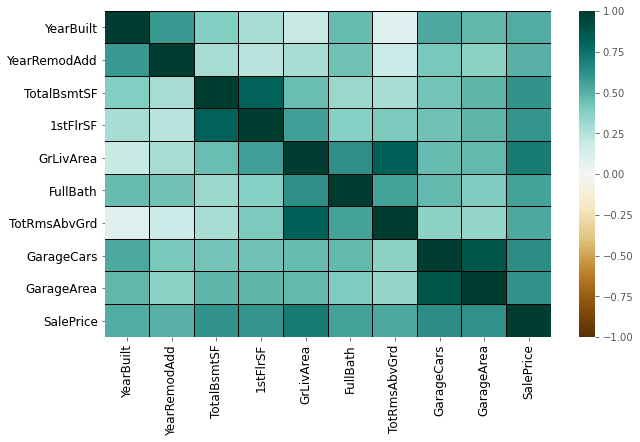

In [9]:
novo_banco = treino[["YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"]]
corr_novo_banco = novo_banco.corr()

plt.figure(figsize = [10, 6])
sns.heatmap(data = corr_novo_banco, vmin = -1, vmax = 1, linewidths = 0.01, linecolor = "black", cmap = "BrBG")
plt.xlabel("", fontsize = 14, color = "black")
plt.ylabel("", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

---

Podemos observar que a **GarageCars** e **GarageArea** apresentaram forte correlação, assim como podemos confirmar abaixo.

---

In [10]:
corr_novo_banco["GarageCars"].round(2)

YearBuilt       0.54
YearRemodAdd    0.42
TotalBsmtSF     0.43
1stFlrSF        0.44
GrLivArea       0.47
FullBath        0.47
TotRmsAbvGrd    0.36
GarageCars      1.00
GarageArea      0.88
SalePrice       0.64
Name: GarageCars, dtype: float64

---

Segundo a descrição do banco de dados, o que é cada variável:

- GarageCars: Tamanho da garagem em capacidade de carros

- GarageArea: Tamanho da garagem em pés quadrados (unidade de área dos Estados Unidos)

Como elas possuem forte correlação entre si, o ideal é que seja escolhida somente uma, neste caso, iremos escolher a GarageArea, pois apresentar mais logicamente uma medida de área. Assim, podemos excluir a variável GarageCars do banco de dados atual `novo_banco`.

---

In [11]:
novo_banco = novo_banco.drop(["GarageCars"], axis = 1)

novo_banco.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,2003,2003,856,856,1710,2,8,548,208500
1,1976,1976,1262,1262,1262,2,6,460,181500
2,2001,2002,920,920,1786,2,6,608,223500
3,1915,1970,756,961,1717,1,7,642,140000
4,2000,2000,1145,1145,2198,2,9,836,250000


---

Podemos também, verificar a relação linear individual entre as variáveis preditoras e a variável `SalePrice` (Y, dependente, target, etc), através de um `scatterplot`.

---

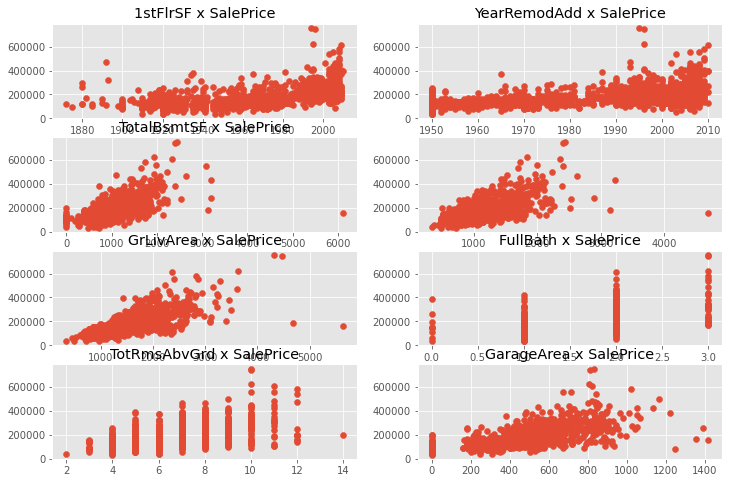

In [12]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 8))


ax[0, 0].scatter(treino["YearBuilt"], treino["SalePrice"])
ax[0, 0].set_title("YearBuilt x SalePrice")

ax[0, 1].scatter(treino["YearRemodAdd"], treino["SalePrice"])
ax[0, 1].set_title("YearRemodAdd x SalePrice")

ax[1, 0].scatter(treino["TotalBsmtSF"], treino["SalePrice"])
ax[1, 0].set_title("TotalBsmtSF x SalePrice")

ax[1, 1].scatter(treino["1stFlrSF"], treino["SalePrice"])
ax[0, 0].set_title("1stFlrSF x SalePrice")

ax[2, 0].scatter(treino["GrLivArea"], treino["SalePrice"])
ax[2, 0].set_title("GrLivArea x SalePrice")

ax[2, 1].scatter(treino["FullBath"], treino["SalePrice"])
ax[2, 1].set_title("FullBath x SalePrice")

ax[3, 0].scatter(treino["TotRmsAbvGrd"], treino["SalePrice"])
ax[3, 0].set_title("TotRmsAbvGrd x SalePrice")

ax[3, 1].scatter(treino["GarageArea"], treino["SalePrice"])
ax[3, 1].set_title("GarageArea x SalePrice")

plt.show()